In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [10]:
sentences = ['I love my dog', 'I love my cat', 'You love my dog!', 'Do you think my dog is amazing?']

tokenizer = Tokenizer(num_words=100, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

print(word_index)
print(sequences)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [11]:
test_data = ['I really love my dog', 'my dog loves my manatee']

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [14]:
padded = pad_sequences(sequences)
print(padded)

[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [16]:
padded = pad_sequences(sequences, padding='post')
print(padded)

[[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


In [17]:
padded = pad_sequences(sequences, padding='post', maxlen=5)
print(padded)

[[ 5  3  2  4  0]
 [ 5  3  2  7  0]
 [ 6  3  2  4  0]
 [ 9  2  4 10 11]]


In [18]:
padded = pad_sequences(sequences, padding='post', maxlen=5, truncating='post')
print(padded)

[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


Sarcasm dataset:

In [2]:
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('datasets/sarcasm/Sarcasm_Headlines_Dataset.json'))

sentences = []
labels = []
urls = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [4]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
m,n = padded.shape
print(m,n)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
26709 40


In [16]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [30]:
training_size = int(0.8*m)
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = np.array(labels[:training_size])
testing_labels = np.array(labels[training_size:])

In [31]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
668/668 - 4s - loss: 0.6741 - accuracy: 0.5742 - val_loss: 0.6129 - val_accuracy: 0.6782 - 4s/epoch - 6ms/step
Epoch 2/30
668/668 - 2s - loss: 0.4597 - accuracy: 0.8164 - val_loss: 0.3918 - val_accuracy: 0.8353 - 2s/epoch - 3ms/step
Epoch 3/30
668/668 - 3s - loss: 0.3245 - accuracy: 0.8725 - val_loss: 0.3577 - val_accuracy: 0.8484 - 3s/epoch - 4ms/step
Epoch 4/30
668/668 - 2s - loss: 0.2745 - accuracy: 0.8925 - val_loss: 0.3472 - val_accuracy: 0.8538 - 2s/epoch - 3ms/step
Epoch 5/30
668/668 - 2s - loss: 0.2394 - accuracy: 0.9070 - val_loss: 0.3413 - val_accuracy: 0.8572 - 2s/epoch - 3ms/step
Epoch 6/30
668/668 - 2s - loss: 0.2116 - accuracy: 0.9184 - val_loss: 0.3456 - val_accuracy: 0.8547 - 2s/epoch - 3ms/step
Epoch 7/30
668/668 - 2s - loss: 0.1905 - accuracy: 0.9290 - val_loss: 0.3572 - val_accuracy: 0.8521 - 2s/epoch - 3ms/step
Epoch 8/30
668/668 - 2s - loss: 0.1719 - accuracy: 0.9364 - val_loss: 0.3659 - val_accuracy: 0.8499 - 2s/epoch - 3ms/step
Epoch 9/30
668/668 - 2s 

In [35]:
sentence = ['granny starting to fear spiders in the garden might be real',
            'game of thrones season finale showing this sunday night',
            'I may not be good enough for your great company',
            'I like you',
            'You are not a good person']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded))

1/1 [==============================] - 0s 56ms/step
[[0.9757321 ]
 [0.00196995]
 [0.9322786 ]
 [0.00320982]
 [0.14003538]]


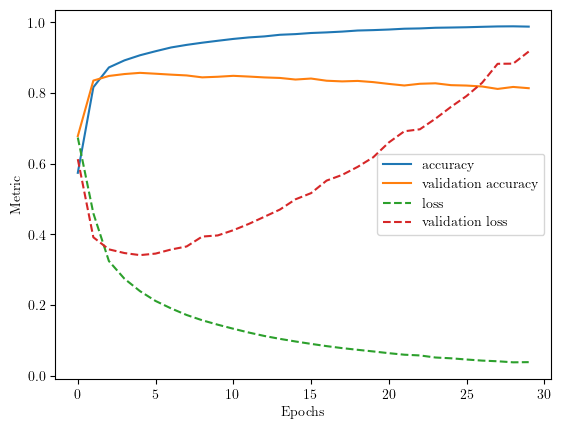

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.plot(history.history['loss'], '--', label='loss')
plt.plot(history.history['val_loss'], '--', label='validation loss')

plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.legend()
plt.show()